In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from committee_learning.initial_conditions import RandomNormalInitialConditions
from committee_learning.simulation import Simulation, NormalizedSphericalConstraintSimulation, LagrangeSphericalConstraintSimulation
from committee_learning.ode import SquaredActivationODE, SphericalSquaredActivationODE
from committee_learning.result import SimulationResult, SquareODEResult

import numpy as np

d = 10000
p = 1
noise = 1e-3
gamma = 0.08
id = 1
log_max_t = 2

ic = RandomNormalInitialConditions(p=p, k=1, d=d, sigma = np.sqrt(d), spherical=True, seed=id)

sim_noco = Simulation(d, p=p, k=1, noise = noise, teacher_W=ic.Wteacher, gamma0=gamma, activation='square', student_init_W=ic.W0)
sim_norm = NormalizedSphericalConstraintSimulation(d, p=p, k=1, noise = noise, teacher_W=ic.Wteacher, gamma0=gamma, activation='square', student_init_W=ic.W0)
sim_lagr = LagrangeSphericalConstraintSimulation(d, p=p, k=1, noise = noise, teacher_W=ic.Wteacher, gamma0=gamma, activation='square', student_init_W=ic.W0)

simr_noco = SimulationResult('noconstraint-spherical', id = id)
simr_noco.from_file_or_run(sim_noco, log_max_t+np.log10(d), 'computation-database/sim/')#,force_run=True)
simr_norm = SimulationResult('normalized-spherical', id = id)
simr_norm.from_file_or_run(sim_norm, log_max_t+np.log10(d), 'computation-database/sim/')#,force_run=True)

In [4]:
ode_noco = SquaredActivationODE(p, 1, noise, gamma, ic.P, ic.Q, ic.M, 1e-3)
oder_noco = SquareODEResult('noconstraint-spherical')
oder_noco.from_file_or_run(ode_noco, log_max_t, 'computation-database/ode/')

ode_ludo = SphericalSquaredActivationODE(p, 1, noise, gamma, ic.P, ic.Q, ic.M, 1e-3)
oder_ludo = SquareODEResult('ludovic-spherical')
oder_ludo.from_file_or_run(ode_ludo, log_max_t, 'computation-database/ode/')#, force_run=True)

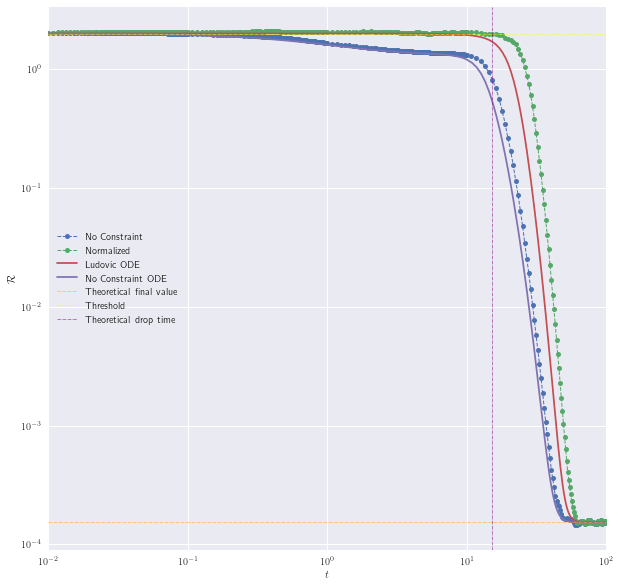

In [5]:
def risk(m):
  return 2*(1-m**2)

risk_threashold = 0.01
m_fixed = np.sqrt(1.-4*noise*gamma**2/(8*gamma*(1.-6.*gamma)))
# t_exit_m = np.log(np.sqrt(risk_threashold)*np.sqrt(d))/(gamma*abs(4*(1-6*gamma)-2*gamma*noise))
t_exit_m = np.log(np.pi/2*(risk_threashold)*d)/(gamma*abs(4*(1-6*gamma)-2*gamma*noise))/2

from committee_learning.utilities import plot_style
import matplotlib.pyplot as plt
with plot_style():
  fig, ax = plt.subplots(figsize=(10,10))
  ax.set_xscale('log')
  ax.set_yscale('log')
  ax.set_xlabel(r'$t$')
  ax.set_ylabel(r'$\mathcal{R}$')
  ax.set_xlim(1e-2,1e2)
  # ax.set_ylim(1e-0,5)
  t = np.array(simr_norm.steps) / float(d)
  ax.plot(t, simr_noco.risks, label=f'No Constraint',ls='--',lw=1.,marker='o',ms=5.)
  ax.plot(t, simr_norm.risks, label=f'Normalized',ls='--',lw=1.,marker='o',ms=5.)
  ax.plot(oder_ludo.times, oder_ludo.risks, label='Ludovic ODE')
  ax.plot(oder_noco.times, oder_noco.risks, label='No Constraint ODE')

  ax.axhline(risk(m_fixed),ls='-.', lw=.5, color='orange', label='Theoretical final value')
  ax.axhline(2*(1-risk_threashold),ls='-.', lw=.5, color='yellow', label='Threshold')
  ax.axvline(t_exit_m, ls='-.', lw=.5, color='purple', label='Theoretical drop time')
  
  ax.legend()
  plt.show()

In [6]:
print('Staring value of m: ', simr_norm.Ms[0][0][0])
s = simr_norm.Ms[-1][0][0]
t = np.sqrt(1.-4*noise*gamma**2/(8*gamma*(1.-6.*gamma)))

print(t)
print((abs(s)-t)/s)

Staring value of m:  0.03292621924588846
0.999961537721865
8.025300414787786e-07
